In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Hierarchical indexing (MultiIndex)

In [2]:
A = pd.DataFrame({'col1': ['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c'],
                  'col2': ['d', 'e', 'f', 'd', 'e', 'f', 'd', 'e', 'f'],
                  'col3': [1, 2, 3, 4, 5, 6, 7, 8, 9]})
A

,col1,col2,col3
0,a,d,1
1,a,e,2
2,a,f,3
3,b,d,4
4,b,e,5
5,b,f,6
6,c,d,7
7,c,e,8
8,c,f,9


In [3]:
B = A.set_index(['col1', 'col2'])
B

col3
col1 col2      
a    d        1
     e        2
     f        3
b    d        4
     e        5
     f        6
c    d        7
     e        8
     f        9

In [4]:
# indexing is similar to regular index
B.loc['a']

,col3
col2,
d,1
e,2
f,3


In [5]:
# tuple to index an item
B.loc[('b', 'e')]

col3    5
Name: (b, e), dtype: int64

In [6]:
# slicing
B.loc['b':'c']

col3
col1 col2      
b    d        4
     e        5
     f        6
c    d        7
     e        8
     f        9

In [7]:
# to check out all 'f'
B.loc[B.index.get_level_values('col2') == 'f']

,,col3
col1,col2,
a,f,3
b,f,6
c,f,9


In [8]:
# or your can use index slicer
B.loc[pd.IndexSlice[:, 'f'], :]

,,col3
col1,col2,
a,f,3
b,f,6
c,f,9


In [9]:
# or you can use cross-section method xs
B.xs('f', level=1, drop_level=False)

,,col3
col1,col2,
a,f,3
b,f,6
c,f,9


In [10]:
# to restore index
B.reset_index()

,col1,col2,col3
0,a,d,1
1,a,e,2
2,a,f,3
3,b,d,4
4,b,e,5
5,b,f,6
6,c,d,7
7,c,e,8
8,c,f,9


# Reshaping and pivot tables

In [11]:
A

,col1,col2,col3
0,a,d,1
1,a,e,2
2,a,f,3
3,b,d,4
4,b,e,5
5,b,f,6
6,c,d,7
7,c,e,8
8,c,f,9


In [12]:
B = A.pivot(index='col1', columns='col2')
B

col3      
col2    d  e  f
col1           
a       1  2  3
b       4  5  6
c       7  8  9

In [13]:
B.stack()

col3
col1 col2      
a    d        1
     e        2
     f        3
b    d        4
     e        5
     f        6
c    d        7
     e        8
     f        9

In [16]:
users = pd.read_csv('../data/users.zip', sep='|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [17]:
users.pivot_table(values='age', index='occupation', columns='gender', aggfunc=['min', 'max', 'mean', 'std'])

min         max             mean                   std  \
gender            F     M     F     M          F          M          F   
occupation                                                               
administrator  22.0  21.0  62.0  70.0  40.638889  37.162791  10.602298   
artist         19.0  20.0  48.0  45.0  30.307692  32.333333   9.542751   
doctor          NaN  28.0   NaN  64.0        NaN  43.571429        NaN   
educator       23.0  25.0  51.0  63.0  39.115385  43.101449   9.003674   
engineer       23.0  22.0  36.0  70.0  29.500000  36.600000   9.192388   
entertainment  24.0  15.0  38.0  50.0  31.000000  29.000000   9.899495   
executive      39.0  22.0  49.0  69.0  44.000000  38.172414   5.000000   
healthcare     22.0  28.0  53.0  62.0  39.818182  45.400000  10.870310   
homemaker      20.0  23.0  50.0  23.0  34.166667  23.000000  10.815113   
lawyer         28.0  21.0  51.0  53.0  39.500000  36.200000  16.263456   
librarian      26.0  23.0  59.0  69.0  40.000000  40.000000  10.776960   
marketing      24.0  24.0  50.0  55.0  37.200000  37.875000   7.728734   
none           26.0  11.0  55.0  33.0  36.500000  18.600000  12.871156   
other          18.0  13.0  55.0  64.0  35.472222  34.028986  10.313614   
programmer     26.0  20.0  38.0  63.0  32.166667  33.216667   5.115336   
retired        70.0  51.0  70.0  73.0  70.000000  62.538462        NaN   
salesman       18.0  21.0  33.0  66.0  27.000000  38.555556   7.937254   
scientist      26.0  23.0  31.0  55.0  28.333333  36.321429   2.516611   
student        13.0   7.0  38.0  42.0  20.750000  22.669118   5.017343   
technician     38.0  21.0  38.0  55.0  38.000000  32.961538        NaN   
writer         18.0  21.0  56.0  60.0  37.631579  35.346154  10.409454   

                          
gender                 M  
occupation                
administrator  11.422472  
artist          8.050436  
doctor         12.501428  
educator       10.755498  
engineer       11.246944  
entertainment  10.373042  
executive      10.931831  
healthcare     12.561847  
homemaker            NaN  
lawyer         10.580905  
librarian      11.596387  
marketing      10.657548  
none            8.734987  
other          10.994612  
programmer      9.986587  
retired         5.621616  
salesman       14.808031  
scientist       7.338652  
student         5.309747  
technician     10.013913  
writer         12.221104

In [18]:
# a very useful function to categorize numbers
pd.cut(users.age, [0, 20, 40, 60, 100])

0      (20, 40]
1      (40, 60]
2      (20, 40]
3      (20, 40]
4      (20, 40]
         ...   
938    (20, 40]
939    (20, 40]
940     (0, 20]
941    (40, 60]
942    (20, 40]
Name: age, Length: 943, dtype: category
Categories (4, interval[int64]): [(0, 20] < (20, 40] < (40, 60] < (60, 100]]

In [19]:
# it is effortless to calculate the female vs male ratio of different age groups
users['age_group'] = pd.cut(users.age, [0, 30, 100])
gender_age = users.pivot_table(values='age', index='occupation', columns=['gender', 'age_group'], aggfunc=['count'])
gender_age

count                            
gender              F                 M          
age_group     (0, 30] (30, 100] (0, 30] (30, 100]
occupation                                       
administrator     8.0      28.0    16.0      27.0
artist            9.0       4.0     7.0       8.0
doctor            NaN       NaN     2.0       5.0
educator          5.0      21.0     8.0      61.0
engineer          1.0       1.0    24.0      41.0
entertainment     1.0       1.0     9.0       7.0
executive         NaN       3.0     7.0      22.0
healthcare        3.0       8.0     1.0       4.0
homemaker         2.0       4.0     1.0       NaN
lawyer            1.0       1.0     4.0       6.0
librarian         9.0      20.0     6.0      16.0
marketing         2.0       8.0     5.0      11.0
none              2.0       2.0     4.0       1.0
other            16.0      20.0    32.0      37.0
programmer        3.0       3.0    32.0      28.0
retired           NaN       1.0     NaN      13.0
salesman          2.0       1.0     3.0       6.0
scientist         2.0       1.0     6.0      22.0
student          58.0       2.0   125.0      11.0
technician        NaN       1.0    14.0      12.0
writer            5.0      14.0    13.0      13.0

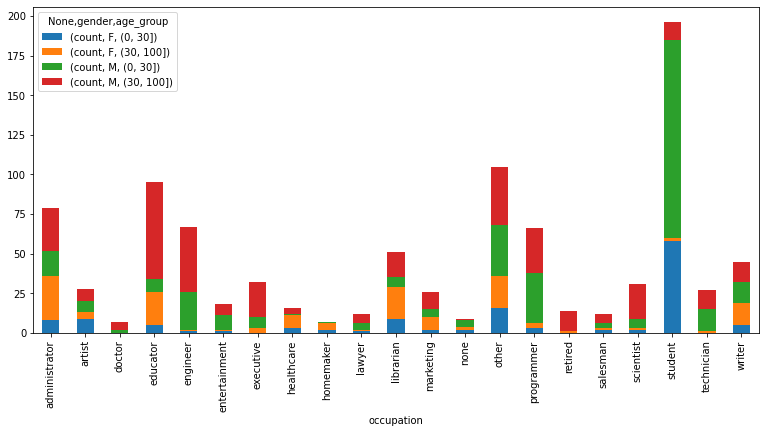

In [20]:
gender_age.plot.bar(figsize=(13, 6), stacked=True)

# Groupby

## Aggregation

In [21]:
# calculate female max age for each occupation
users.query('gender == "F"').groupby('occupation').age.max()

occupation
administrator    62
artist           48
educator         51
engineer         36
entertainment    38
executive        49
healthcare       53
homemaker        50
lawyer           51
librarian        59
marketing        50
none             55
other            55
programmer       38
retired          70
salesman         33
scientist        31
student          38
technician       38
writer           56
Name: age, dtype: int64

In [22]:
# applying to specific columns
users.groupby('gender').agg({'age':np.mean, 'user_id':np.size})

,age,user_id
gender,,
F,33.813187,273
M,34.149254,670


In [23]:
# applying multiple functions
users.groupby('gender').age.agg(m=np.mean, s=np.size)

,m,s
gender,,
F,33.813187,273
M,34.149254,670


In [24]:
# Week 4 exercise
Brand = ['Ford', 'Ford',   'Chevy',   'Chevy',   'Honda', 'Ford',   'Honda', 'Honda', 'Ford', 'Chevy']
Model = ['F150', 'Escape', 'Charger', 'Charger', 'Civic', 'Escape', 'CRV',   'CRV',   'F150', 'Silverado']
Type = ['Pickup', 'SUV', 'Sedan', 'Sedan', 'Sedan', 'SUV', 'SUV',   'SUV',   'Pickup', 'Pickup']
Accidents = [25, 79, 46, 90, 29, 88, 79, 93, 20, 11]
cars = pd.DataFrame(dict(brand=Brand, model=Model, type=Type, accidents=Accidents))
cars

,brand,model,type,accidents
0,Ford,F150,Pickup,25
1,Ford,Escape,SUV,79
2,Chevy,Charger,Sedan,46
3,Chevy,Charger,Sedan,90
4,Honda,Civic,Sedan,29
5,Ford,Escape,SUV,88
6,Honda,CRV,SUV,79
7,Honda,CRV,SUV,93
8,Ford,F150,Pickup,20
9,Chevy,Silverado,Pickup,11


In [25]:
# Find the brand and model of the safest car
cars.groupby(['brand', 'model']).accidents.mean().sort_values().tail(3)

brand  model  
Chevy  Charger    68.0
Ford   Escape     83.5
Honda  CRV        86.0
Name: accidents, dtype: float64

In [26]:
# Find the safest brand for each vehicle type (one line)
cars.groupby('brand').accidents.agg(s=np.sum, m=np.mean)

,s,m
brand,,
Chevy,147,49
Ford,212,53
Honda,201,67


In [ ]:
# Calculate the total accidents for each brand and vehicle type, respectively.




# Time Series

## Convert to Timestamp

In [27]:
# You can use either pd.to_datetime or pd.Timestamp
print(pd.to_datetime('2010/11/12'))
print(pd.Timestamp('2020/11/12'))

2010-11-12 00:00:00
2020-11-12 00:00:00


In [28]:
# pandas usually is very intelligent to convert dates in different format but you can also specify the format mannually
print(pd.to_datetime('2010/11/12', format='%Y/%m/%d'))
print(pd.to_datetime('12-11-2020 00:00', format='%d-%m-%Y %H:%M'))

2010-11-12 00:00:00
2020-11-12 00:00:00


## Construct DatatimeIndex

In [29]:
# pd.DatetimeIndex is frequently used to construct datetimeIndex
pd.DatetimeIndex(['2005/11/23', '2010.12.31', 'Jul 31, 2009', '2012-2-28'])

DatetimeIndex(['2005-11-23', '2010-12-31', '2009-07-31', '2012-02-28'], dtype='datetime64[ns]', freq=None)

In [30]:
#  to_datetime can also be used
pd.to_datetime(['2005/11/23', '2010.12.31', 'Jul 31, 2009', '2012-2-28'])

DatetimeIndex(['2005-11-23', '2010-12-31', '2009-07-31', '2012-02-28'], dtype='datetime64[ns]', freq=None)

In [31]:
#  to_datetime will retuen series if the input is Series
pd.to_datetime(pd.Series(['2005/11/23', '2010.12.31', 'Jul 31, 2009', '2012-2-28']))

0   2005-11-23
1   2010-12-31
2   2009-07-31
3   2012-02-28
dtype: datetime64[ns]

In [32]:
# but if you use it as index for Series or DataFrame it will be converted to DatatimeIndex automatically
A = pd.Series(range(4), index=pd.to_datetime(pd.Series(['2005/11/23', '2010.12.31', 'Jul 31, 2009', '2012-2-28'])))
A.index

DatetimeIndex(['2005-11-23', '2010-12-31', '2009-07-31', '2012-02-28'], dtype='datetime64[ns]', freq=None)

In [33]:
# if you have a DataFrame with year, month and day columns, you could convert to TimeStamp Series
df = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5], 'hour': [2, 3]})
print(df, '\n\n')

print(pd.to_datetime(df))

   year  month  day  hour
0  2015      2    4     2
1  2016      3    5     3 


0   2015-02-04 02:00:00
1   2016-03-05 03:00:00
dtype: datetime64[ns]


## Generating ranges of timestamps

In [34]:
start = pd.datetime(2011, 1, 1)
end = pd.datetime(2012, 12, 31)
time_idx = pd.date_range(start, end, freq='M')
time_idx

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31'],
              dtype='datetime64[ns]', freq='M')

In [35]:
# if you just want to see the business days
pd.bdate_range(start, end, freq='M')

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31'],
              dtype='datetime64[ns]', freq='M')

## Indexing Datetime

In [36]:
time_idx = pd.date_range('2000', '2009', freq='D')
time_ser = pd.Series(np.random.random(time_idx.shape), index=time_idx)
time_ser

2000-01-01    0.791670
2000-01-02    0.281178
2000-01-03    0.333163
2000-01-04    0.915380
2000-01-05    0.912683
                ...   
2008-12-28    0.404024
2008-12-29    0.632848
2008-12-30    0.876210
2008-12-31    0.338594
2009-01-01    0.034044
Freq: D, Length: 3289, dtype: float64

In [37]:
#  If the string is less accurate than the index, it will be treated as a slice, otherwise as an exact match.
print('2005-01-01\n', time_ser['2005-01-01'], '\n\n')
print('2005-01\n', time_ser['2005-01'])

2005-01-01
 0.2845400428175855 


2005-01
 2005-01-01    0.284540
2005-01-02    0.519232
2005-01-03    0.322799
2005-01-04    0.786453
2005-01-05    0.074254
2005-01-06    0.253610
2005-01-07    0.748339
2005-01-08    0.756152
2005-01-09    0.959847
2005-01-10    0.793885
2005-01-11    0.792108
2005-01-12    0.503613
2005-01-13    0.818998
2005-01-14    0.271725
2005-01-15    0.582433
2005-01-16    0.271910
2005-01-17    0.041806
2005-01-18    0.671404
2005-01-19    0.399806
2005-01-20    0.727348
2005-01-21    0.235050
2005-01-22    0.717815
2005-01-23    0.008767
2005-01-24    0.552623
2005-01-25    0.123794
2005-01-26    0.612750
2005-01-27    0.001269
2005-01-28    0.466367
2005-01-29    0.262291
2005-01-30    0.079414
2005-01-31    0.729052
Freq: D, dtype: float64


In [38]:
# time indexing
print(time_ser['2005-01-01':'2007-02-15'])


2005-01-01    0.284540
2005-01-02    0.519232
2005-01-03    0.322799
2005-01-04    0.786453
2005-01-05    0.074254
                ...   
2007-02-11    0.244617
2007-02-12    0.550576
2007-02-13    0.336148
2007-02-14    0.784739
2007-02-15    0.174215
Freq: D, Length: 776, dtype: float64


In [39]:
# partial indexing
time_ser['2005-01':'2007-02']

2005-01-01    0.284540
2005-01-02    0.519232
2005-01-03    0.322799
2005-01-04    0.786453
2005-01-05    0.074254
                ...   
2007-02-24    0.706592
2007-02-25    0.796378
2007-02-26    0.270069
2007-02-27    0.139145
2007-02-28    0.739827
Freq: D, Length: 789, dtype: float64

In [40]:
# partial indexing, year only
time_ser['2005':'2007']

2005-01-01    0.284540
2005-01-02    0.519232
2005-01-03    0.322799
2005-01-04    0.786453
2005-01-05    0.074254
                ...   
2007-12-27    0.898166
2007-12-28    0.667543
2007-12-29    0.225955
2007-12-30    0.931907
2007-12-31    0.791370
Freq: D, Length: 1095, dtype: float64

In [41]:
# Shifting / lagging
time_ser.shift(2, freq='W') # careful this will also change the frequency of the index

2000-01-09    0.791670
2000-01-16    0.281178
2000-01-16    0.333163
2000-01-16    0.915380
2000-01-16    0.912683
                ...   
2009-01-11    0.404024
2009-01-11    0.632848
2009-01-11    0.876210
2009-01-11    0.338594
2009-01-11    0.034044
Length: 3289, dtype: float64

## Resampling

In [42]:
# basic
rs = time_ser.resample('M')
rs

In [43]:
# apply stat functions: sum, mean, std, sem, max, min, median, first, last, ohlc:
print('monthly sum:\n', time_ser.resample('M').sum(), '\n\n')
print('monthly mean:\n', time_ser.resample('MS').mean())

monthly sum:
 2000-01-31    16.916376
2000-02-29    13.647678
2000-03-31    15.570718
2000-04-30    19.818709
2000-05-31    15.233663
                ...    
2008-09-30    14.938674
2008-10-31    14.896530
2008-11-30    15.113581
2008-12-31    15.339725
2009-01-31     0.034044
Freq: M, Length: 109, dtype: float64 


monthly mean:
 2000-01-01    0.545690
2000-02-01    0.470610
2000-03-01    0.502281
2000-04-01    0.660624
2000-05-01    0.491408
                ...   
2008-09-01    0.497956
2008-10-01    0.480533
2008-11-01    0.503786
2008-12-01    0.494830
2009-01-01    0.034044
Freq: MS, Length: 109, dtype: float64


In [44]:
# apply general function
time_ser.resample('M').apply(lambda x: (x**2).sum())

2000-01-31    11.375230
2000-02-29     8.702828
2000-03-31    10.034138
2000-04-30    14.336777
2000-05-31    10.648622
                ...    
2008-09-30     9.270637
2008-10-31    10.465447
2008-11-30     9.931957
2008-12-31     9.689083
2009-01-31     0.001159
Freq: M, Length: 109, dtype: float64

# Visualization

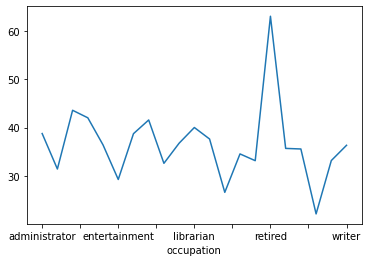

In [45]:
users.groupby('occupation').age.mean().plot()

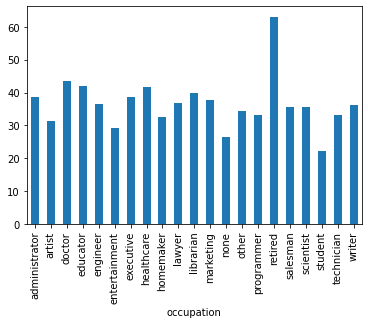

In [46]:
users.groupby('occupation').age.mean().plot.bar()

In [ ]:
tractor = pd.read_excel('test.10-24.2-time_RAR.xlsx', 'test.10-24.2-time')
tractor

In [ ]:
tractor.plot.scatter('longitude', 'lattitude', s=1, c='eng_torque', cmap='jet', vmin=10, vmax=15)

In [ ]:
# seems there is outlier
tractor_clean = tractor.query('lattitude > 40')
tractor_clean.plot.scatter('longitude', 'lattitude', s=1, c='eng_torque', cmap='jet', vmin=10, vmax=15)